# BVP to solve the TPBVP with free end time

In [15]:
%load_ext autoreload
%autoreload 2

from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://www.dropbox.com/s/o48uhuwah8n2xww/basic_material.py?dl=0
%run basic_material

from scipy.integrate import solve_bvp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Running Python: 3.9.9


$$ \ddot y = f(t,y(t)) $$
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html

In [16]:
N = 1000
y0 = 2
yf = 0.2
alpha = -0.5
beta = 0.9
t = np.linspace(0, 1, N)

In [17]:
def bc(ya, yb):
    bc_free_end_time = 0.5*(yb[0]**2 + (-yb[1])**2) + yb[1]*(-yb[1]+alpha*yb[0]**3) 
    return np.array([ya[0] - y0, yb[0] - yf, bc_free_end_time])

def fun(t,x):
    return np.array(x[2]*[alpha*x[0]**3 - x[1], -x[0] - 2*alpha*x[1]*x[0]**2,0*x[0]])

In [18]:
y_init = np.zeros((2+1,N))
y_init[0,:] = [y0 for i in range(N)] 
y_init[1,:] = [y0 for i in range(N)] 
y_init[2,:] = [1 for i in range(N)] 

res = solve_bvp(fun, bc, t, y_init, max_nodes=10000, tol=1e-8)
print(res.success)

True


In [19]:
# Compute time variable
tt = res.x*res.y[2,0]
v_approx = y0*np.exp(-beta*tt)

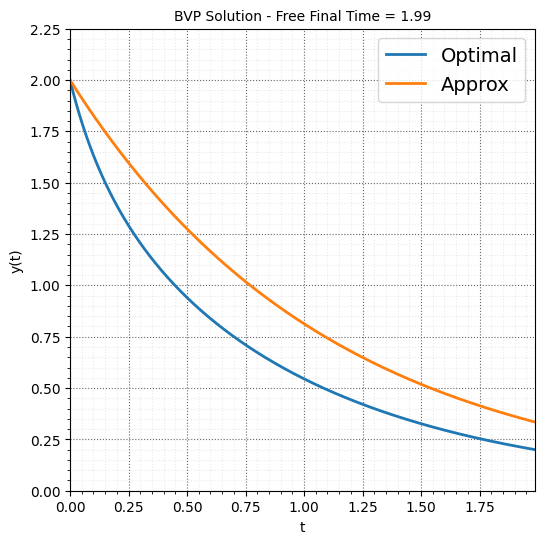

In [20]:
plt.figure(figsize = (6,6))
plt.plot(tt, res.y[0,:],label='Optimal')
plt.plot(tt, v_approx,label='Approx')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.legend(fontsize=14)

plt.title('BVP Solution - Free Final Time = '+str(round(res.y[2,0],2)))
plt.xlim([min(tt),max(tt)])
plt.ylim([0,2.25])
nicegrid()
plt.savefig("figs/bvp_cubic_free1.png")
plt.show()

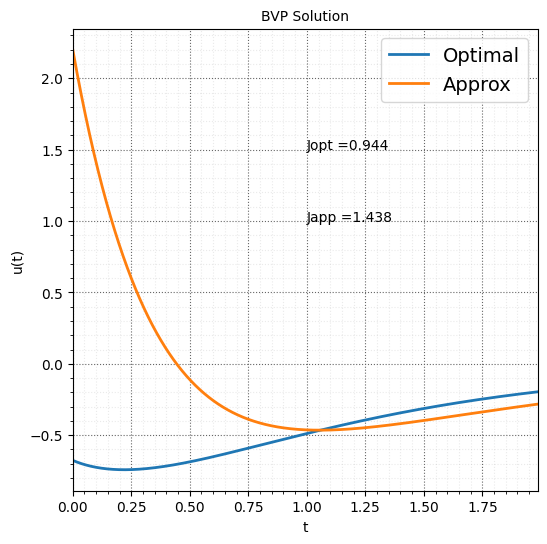

In [21]:
dt = tt[1]-tt[0]
u_optimal = -res.y[1,:]
u_approx = -alpha*v_approx**3 - beta*v_approx

dtt = np.diff(tt)
integ = (res.y[0,:]**2 + u_optimal**2)
Integral_optimal = np.dot(integ[:-1],dtt)/2
integ = (v_approx**2 + u_approx**2)
Integral_approx = np.dot(integ[:-1],dtt)/2

plt.figure(figsize = (6,6))
plt.plot(tt, u_optimal,label='Optimal')
plt.plot(tt, u_approx,label='Approx')
plt.legend()
plt.xlabel('t')
plt.ylabel('u(t)')
plt.legend(fontsize=14)
plt.text(1,1.5,'Jopt ='+str(round(Integral_optimal,3)))
plt.text(1,1,'Japp ='+str(round(Integral_approx,3)))
plt.title('BVP Solution')
plt.xlim([min(tt),max(tt)])
nicegrid()
plt.savefig("figs/bvp_cubic_free2.png")
plt.show()